In [1]:
# 1.Create a class 'Solow' with attributes being the parameters of the model (n, s, 𝛿, 𝛼, g);(Cobb_Douglas function)
class Solow:
    def __init__(self, n, s, 𝛿, 𝛼, g):
        self.n, self.s, self.𝛿, self.𝛼, self.g = n, s, 𝛿, 𝛼, g
        
    # 2. Add a method which calculates the RHS of the equation (1), given a value for  𝑘𝑡    
    def calc_next_k(self,k_t):
        return ((self.s*(k_t**self.𝛼) + (1-self.𝛿)*k_t)/((1+self.g)*(1+self.n)))
    
    # 3.Add a method that updates the current value of k_t
    def update_k_t(self, k_t):
        k_t = self.calc_next_k(k_t)
        return k_t
    # 4.Add a method that generates a sequence of values for k_t, for t periods
    def gen_k_sequence(self, k_t, t):
        k_sequence = [k_t]
        for index in range(t):
            k_sequence.append(self.calc_next_k(k_sequence[index]))
        return k_sequence
    
    # 5.Add a method that calculates the steady state
    def calc_steady_state(self):
        return ((self.s)/(self.g + self.n + self.δ + self.g * self.n)) ** (1 / (1 - self.α))   
    
    # 6. Add a method that computes the value of the aggregate variables from a value of  𝑘, 𝐴, and 𝐿
    def calc_aggregate(self, k_t, A_t, L_t):
        agg_var = {}
        K_t = k_t * A_t * L_t
        Y_t = ((k_t * A_t * L_t)**(self.𝛼) * (A_t * L_t)**(1-self.𝛼))
        I_t = Y_t * self.s
        C_t = Y_t * (1-self.s)
        agg_var['K'], agg_var['Y'], agg_var['I'], agg_var['C'] = K_t, Y_t, I_t, C_t
        return agg_var 
    
    # 7. Add a method that computes the per worker variables.
    def calc_per_worker(self, k_t, A_t, L_t):
        agg_var = self.calc_aggregate(k_t, A_t, L_t)
        denominator = A_t*L_t
        pw_var = {} #per-worker variables
        y_t = agg_var["Y"]/denominator #output per efficient worker
        c_t = agg_var["C"]/denominator #consumption per efficient worker
        i_t = agg_var["I"]/denominator #investment per efficient worker
        
        pw_var['k'], pw_var['y'], pw_var['i'], pw_var['c'] = k_t,y_t,i_t,c_t

        return pw_var

    # 8. (UPDATED FROM TIANYIN) Add a method that generates a series of per worker variables¶.
    def gen_per_worker_seq(self, k_t, A_t, L_t, t):
        pw_sequence ={'k':[],'y':[],'i':[],'c':[]} 
        keys = list(pw_sequence.keys())
        for index in range(t):
            pw_var = self.calc_per_worker(k_t, A_t, L_t)
            for k in keys:
                pw_sequence[k].append(pw_var[k])
            k_t = self.calc_next_k(k_t)
            A_t = (1+self.g)*A_t
            L_t = (1+self.n)*L_t  
        return pw_sequence

In [2]:
example = Solow (n = 0.03, s = 0.3, δ = 0.01, α = 0.3, g = 0.02)

In [3]:
example.calc_next_k(k_t=3)

3.223983201118192

In [4]:
example.update_k_t(k_t=3)

3.223983201118192

In [5]:
example.gen_k_sequence(k_t=3, t=5)

[3,
 3.223983201118192,
 3.443716478546468,
 3.6588798628747936,
 3.869224781440073,
 4.074562720361791]

In [6]:
example.calc_steady_state()

9.825511912007629

In [7]:
example.calc_aggregate(k_t=3, A_t=0.3, L_t=100)

{'K': 89.99999999999999,
 'Y': 41.71167510947727,
 'I': 12.51350253284318,
 'C': 29.198172576634086}

In [8]:
example.calc_per_worker(k_t=3, A_t=0.3, L_t=100)

{'k': 3,
 'y': 1.390389170315909,
 'i': 0.4171167510947727,
 'c': 0.9732724192211362}

In [9]:
example.gen_per_worker_seq(k_t=3, A_t=0.3, L_t=100, t=3)

{'k': [3, 3.223983201118192, 3.443716478546468],
 'y': [1.390389170315909, 1.4207505441796962, 1.4491329005841829],
 'i': [0.4171167510947727, 0.4262251632539088, 0.4347398701752549],
 'c': [0.9732724192211362, 0.9945253809257874, 1.014393030408928]}

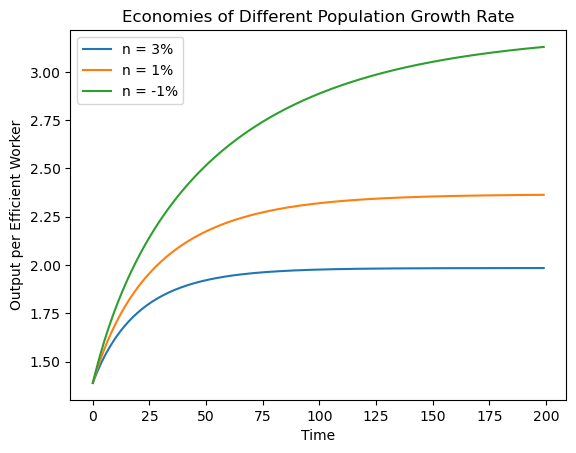

In [10]:
# 9.Scenario Analysis 1: Two countries only differ in their population growth rate n.
import matplotlib.pyplot as plt

time = 200
time_var = list(range(time))

economy1 = Solow (n = 0.03, s = 0.3, δ = 0.01, α = 0.3, g = 0.02)
economy2 = Solow (n = 0.01, s = 0.3, δ = 0.01, α = 0.3, g = 0.02)
economy3 = Solow (n = -0.01, s = 0.3, δ = 0.01, α = 0.3, g = 0.02)

y_seq_1 = economy1.gen_per_worker_seq(k_t = 3, A_t = 0.3, L_t = 100, t = time)['y']
y_seq_2 = economy2.gen_per_worker_seq(k_t = 3, A_t = 0.3, L_t = 100, t = time)['y']
y_seq_3 = economy3.gen_per_worker_seq(k_t = 3, A_t = 0.3, L_t = 100, t = time)['y']

plt.plot(time_var, y_seq_1, label = 'n = 3%')
plt.plot(time_var, y_seq_2, label = 'n = 1%')
plt.plot(time_var, y_seq_3, label = 'n = -1%')
plt.title('Economies of Different Population Growth Rate')
plt.xlabel("Time")
plt.ylabel("Output per Efficient Worker")
plt.legend()
plt.show()